### LLM for clustering - How to use the OpenAI API

In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..','..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from pathlib import Path

import time
import pandas as pd
import matplotlib.pyplot as plt
from openai import AzureOpenAI

# Result directory
result_dir = Path("Results/LLM")
# Create the directory if it doesn't exist
result_dir.mkdir(parents=True, exist_ok=True)

In [2]:
# Retry mechanism
def call_openai_with_retry(client, model, messages, retries=3, delay=60):
    for attempt in range(retries):
        try:
            response = client.chat.completions.create(
                model=model,
                messages=messages
            )
            return response
        except Exception as e:
            if "429" in str(e):
                print(f"Rate limit exceeded. Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                raise e
    raise Exception("Max retries exceeded.")

# Set Azure OpenAI endpoint and API key as environment variables
os.environ["AZURE_OPENAI_ENDPOINT"] = "https://ansys-matbu-hackathon.openai.azure.com/"
os.environ["AZURE_OPENAI_API_KEY"] = ""

client = AzureOpenAI(
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
    api_key=os.getenv("AZURE_OPENAI_API_KEY"),
    api_version="2024-12-01-preview"
)

# Read csv file
import json
csv_file_path = result_dir / 'imported_data.csv'
df = pd.read_csv(csv_file_path)
json_data = df.to_dict(orient='records')

# Prepare prompts
system_prompt = "You are a data scientist skilled in machine learning and data analysis, and visualization. Provide insights and code examples for data-related tasks."
# Send only the first 5 records or a subset of the JSON data
user_prompt = f"Analyze the following csv file and do a clustering analysis. Generate a full python script using a .csv file: {json.dumps(json_data[:500])}"

messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": user_prompt}
]

response = call_openai_with_retry(client, model='gpt-4.1', messages=messages)

# Extract full response content
full_response = response.choices[0].message.content

# Save the full response to a text file with UTF-8 encoding
with open(result_dir / 'openai_response.txt', 'w', encoding='utf-8') as f:
    f.write(full_response)

# Print the full response
print(full_response)

Certainly! I will show you how to perform a **clustering analysis** using Python on your data. The goal is to group data points with similar properties (`MODULUS_GPa` and `HARDNESS_GPa`) using KMeans and visualize the clusters in property space as well as on the spatial map.

**Steps in the Script:**
1. Load the data from CSV.
2. Select features for clustering (`MODULUS_GPa` and `HARDNESS_GPa`).
3. Standardize the features.
4. Apply KMeans clustering (using the elbow method to select K, or a fixed value).
5. Visualize results in property space and in spatial (X,Y) map.

Below is the complete script; just replace the filename with your actual CSV file.

---

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ========= 1. Load the data ===========

# If your data is stored in JSON, first save it as 'data.c

### Copy and paste the openai response below

Head of the data:
    X Position_µm  Y Position_µm  MODULUS_GPa  HARDNESS_GPa
0              0              0      268.522        23.307
1              2              0      224.329         8.073
2              4              0      249.184         7.273
3              6              0      274.592         6.630
4              8              0      287.293         5.951

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X Position_µm  625 non-null    int64  
 1   Y Position_µm  625 non-null    int64  
 2   MODULUS_GPa    625 non-null    float64
 3   HARDNESS_GPa   625 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 19.7 KB
None

NaN summary:
 X Position_µm    0
Y Position_µm    0
MODULUS_GPa      0
HARDNESS_GPa     0
dtype: int64

After dropping NaN: 625 rows left.


c:\Users\dmercier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters: 2, Silhouette Score: 0.503
Clusters: 3, Silhouette Score: 0.478
Clusters: 4, Silhouette Score: 0.467


c:\Users\dmercier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dmercier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dmercier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters: 5, Silhouette Score: 0.478
Clusters: 6, Silhouette Score: 0.445


c:\Users\dmercier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


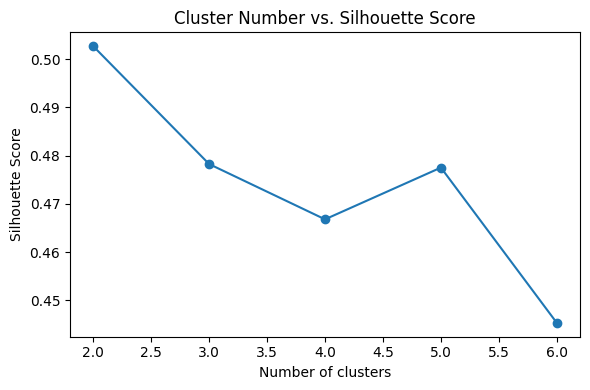


Optimal number of clusters: 2


c:\Users\dmercier\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


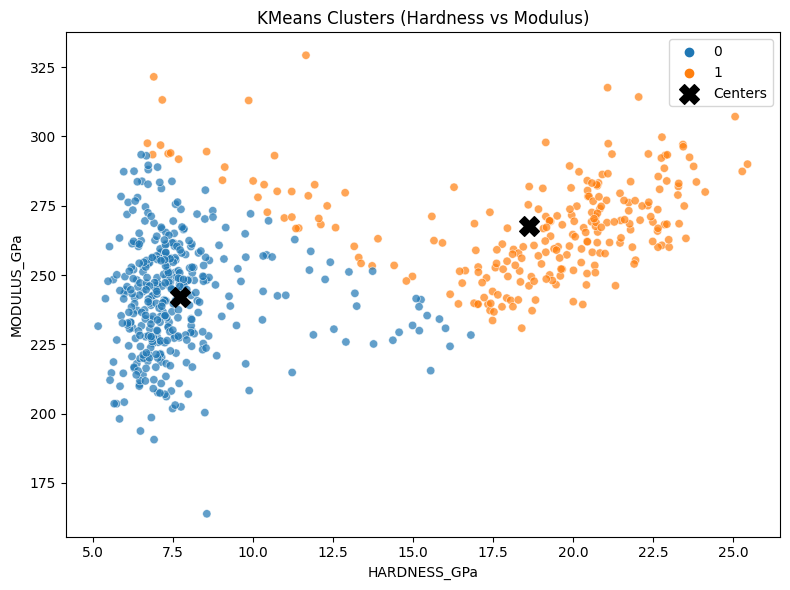


Cluster Summary Statistics:
         HARDNESS_GPa                          MODULUS_GPa                      \
                mean       std    min     max        mean        std      min   
cluster                                                                         
0           7.712506  1.994772  5.151  16.800  242.110044  19.964580  163.865   
1          18.608571  4.076456  6.691  25.445  267.856550  17.829013  230.840   

                  
             max  
cluster           
0        293.436  
1        329.307  

Clustered data saved to 'data_with_clusters.csv'.


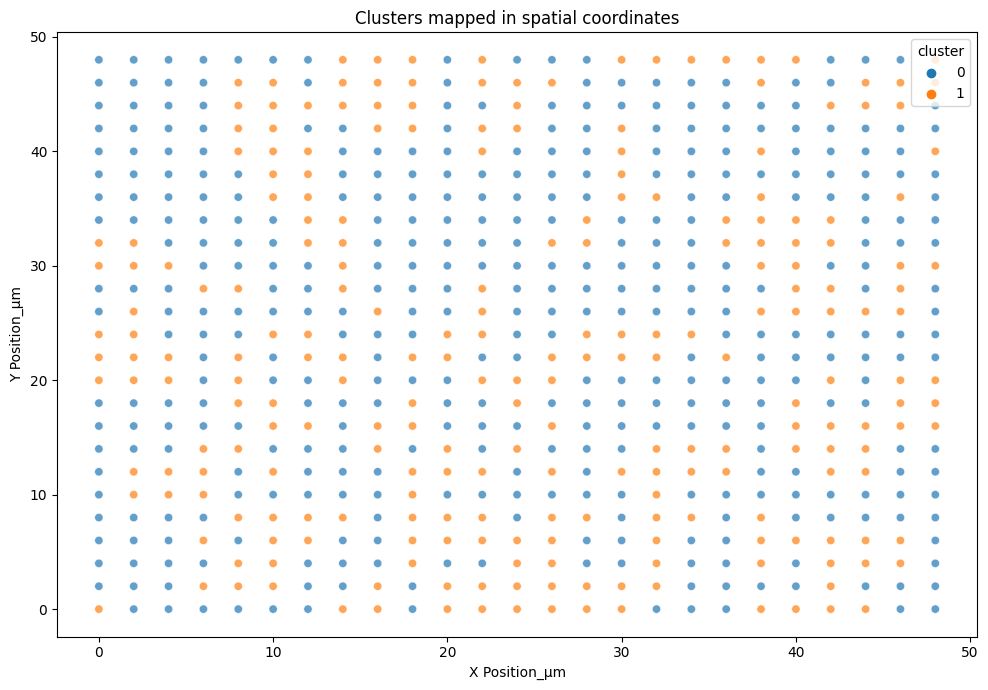

In [4]:
# Certainly! Here is a full Python script to analyze your CSV data for clustering. The script will:

# 1. **Load the data** (assuming you save it as `data.csv`).
# 2. **Clean and preprocess** (handle NaNs).
# 3. **Standardize features**.
# 4. **K-Means clustering** (with optimal cluster selection using silhouette score).
# 5. **Visualize clustering results** (scatter plot and cluster centers).
# 6. **Show summary statistics per cluster**.

# You can use this code with your CSV file.  
# **If your data is still in JSON, you can first convert it with pandas:**


# ### Main Analysis Code (`clustering_analysis.py`)

# ```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load the data
df = pd.read_csv(result_dir / 'imported_data.csv')

# 2. Quick Exploration
print("Head of the data:\n", df.head())
print("\nData info:")
print(df.info())
print("\nNaN summary:\n", df.isna().sum())

# 3. Drop rows with NaN in features used for clustering
features = ['HARDNESS_GPa', 'MODULUS_GPa']
df_cluster = df.dropna(subset=features).copy()

print(f"\nAfter dropping NaN: {df_cluster.shape[0]} rows left.")

# 4. Standardize the features for clustering
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster[features])

# 5. Determine optimal number of clusters with silhouette score
range_n_clusters = range(2, 7)
scores = []
for n in range_n_clusters:
    km = KMeans(n_clusters=n, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Clusters: {n}, Silhouette Score: {score:.3f}")
    scores.append(score)

# Plot silhouette scores to choose optimal
plt.figure(figsize=(6,4))
plt.plot(range_n_clusters, scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Cluster Number vs. Silhouette Score')
plt.tight_layout()
plt.show()

optimal_clusters = range_n_clusters[np.argmax(scores)]
print(f"\nOptimal number of clusters: {optimal_clusters}")

# 6. Fit final clustering
km = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = km.fit_predict(X)
df_cluster['cluster'] = cluster_labels

# 7. Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cluster,
    x='HARDNESS_GPa', y='MODULUS_GPa',
    hue='cluster', palette='tab10', alpha=0.7
)
# Plot cluster centers (inverse transform to original units)
centers = scaler.inverse_transform(km.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], 
    s=200, c='black', marker='X', label='Centers')
plt.legend()
plt.title('KMeans Clusters (Hardness vs Modulus)')
plt.tight_layout()
plt.show()

# 8. Cluster summary statistics
summary = df_cluster.groupby('cluster')[features].agg(['mean','std','min','max'])
print("\nCluster Summary Statistics:\n", summary)

# 9. Save clustered data for reference
df_cluster.to_csv('data_with_clusters.csv', index=False)
print("\nClustered data saved to 'data_with_clusters.csv'.")

# 10. Optionally, spatial plot
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_cluster,
    x='X Position_µm', y='Y Position_µm', hue='cluster', palette='tab10', alpha=0.7
)
plt.title('Clusters mapped in spatial coordinates')
plt.tight_layout()
plt.show()
# ```

# ---

# **How to run:**

# 1. Save your CSV file as `data.csv` in the same directory.
# 2. Save this script as `clustering_analysis.py`.
# 3. Run: `python clustering_analysis.py`

# **You can adjust feature selection, cluster range, or plotting as needed!**  
# Let me know if you'd like PCA or alternative clustering (DBSCAN) as well.